In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
%matplotlib inline

plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [9]:
path = r'data'

In [27]:
gpa = pd.read_csv("data/gpa_Data.csv",index_col=0)

In [28]:
gpa.head()

,StudentID,SchoolYear,SchoolName,SchoolCode,Grade,ELLServed,SpecialEducation,Section504Flag,AAM,SOCFFEJ,...,HomeLanguage,PrimaryLanguageName,Race,HighlyCapable,AdvancedLearning,FreeReducedLunch,Gender,Age,GPA,CreditsEarned
0,5460134,2010,Roosevelt High School,17,12,N,Y,N,N,N,...,English,English,White,0,0,0.0,M,31,4.000,33.0
1,5460134,2010,Roosevelt High School,17,12,N,Y,N,N,N,...,English,English,White,0,0,0.0,M,31,4.000,36.0
2,5460142,2010,Roosevelt High School,17,12,N,Y,N,N,N,...,English,English,Asian,0,0,1.0,M,31,3.747,32.7
3,5460142,2010,Roosevelt High School,17,12,N,Y,N,N,N,...,English,English,Asian,0,0,1.0,M,31,3.747,35.7
4,5485818,2010,Nathan Hale High School,22,12,N,Y,N,N,N,...,English,English,White,0,0,0.0,F,31,4.000,40.3


In [29]:
gpa.describe()

,StudentID,SchoolYear,SchoolCode,Grade,HighlyCapable,AdvancedLearning,FreeReducedLunch,Age,GPA,CreditsEarned
count,4.042040e+05,404204.000000,404204.000000,404204.000000,404204.000000,404204.000000,404204.000000,404204.000000,404204.000000,404204.000000
mean,6.936012e+06,2014.790561,93.898774,10.538223,0.055244,0.104420,0.417255,21.417579,3.026991,13.327101
std,6.169046e+05,2.849965,219.229324,1.138482,0.228457,0.305805,0.493106,3.177050,0.722946,7.888160
min,5.460134e+06,2010.000000,11.000000,9.000000,0.000000,0.000000,0.000000,13.000000,0.857000,0.020000
25%,6.517700e+06,2012.000000,14.000000,9.000000,0.000000,0.000000,0.000000,19.000000,2.450000,6.250000
50%,6.788673e+06,2015.000000,18.000000,11.000000,0.000000,0.000000,0.000000,21.000000,3.100000,12.750000
75%,7.108756e+06,2017.000000,22.000000,12.000000,0.000000,0.000000,1.000000,24.000000,3.684000,19.500000
max,8.170568e+06,2019.000000,983.000000,12.000000,1.000000,1.000000,1.000000,31.000000,4.000000,58.750000


In [30]:
gpa.columns =('StudentID','SchoolYear','SchoolName','SchoolCode','Grade','ELLServed','SpecialEducation','Section504Flag','AAM','SOCFFEJ','RemoteLearning','HomeLanguage','PrimaryLanguageName','Race','HighlyCapable','AdvancedLearning','FreeReducedLunch','Gender','Age','GPA','CreditsEarned')

In [31]:
gpa.shape

(404204, 21)

In [32]:
gpa1 = gpa.dropna()

In [82]:
gpa2 = gpa1.replace({'AAM': {'Y':1, 'N': 0},
            'SOCFFEJ': {'Y':1, 'N': 0},
            'ELLServed': {'Y':1, 'N': 0},
            'SpecialEducation':{'Y':1, 'N': 0},
            'Section504Flag':{'Y':1, 'N': 0},
            'Race':{'White':1, 'Black':2,'Asian':3, 'Hispanic':4, 'Pacific Islander':5,'American Indian':6, 'Multiracial':7},
            'SpecialEducation':{'Y':1, 'N': 0},       
            'Gender':{'F':0, 'M': 1, 'X':2}})

In [83]:
gpa2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404204 entries, 0 to 819328
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   StudentID            404204 non-null  int64  
 1   SchoolYear           404204 non-null  int64  
 2   SchoolName           404204 non-null  object 
 3   SchoolCode           404204 non-null  int64  
 4   Grade                404204 non-null  int64  
 5   ELLServed            404204 non-null  int64  
 6   SpecialEducation     404204 non-null  int64  
 7   Section504Flag       404204 non-null  int64  
 8   AAM                  404204 non-null  int64  
 9   SOCFFEJ              404204 non-null  int64  
 10  RemoteLearning       404204 non-null  object 
 11  HomeLanguage         404204 non-null  object 
 12  PrimaryLanguageName  404204 non-null  object 
 13  Race                 404204 non-null  int64  
 14  HighlyCapable        404204 non-null  int64  
 15  AdvancedLearning 

In [84]:
gpa2.isnull().sum()

StudentID              0
SchoolYear             0
SchoolName             0
SchoolCode             0
Grade                  0
ELLServed              0
SpecialEducation       0
Section504Flag         0
AAM                    0
SOCFFEJ                0
RemoteLearning         0
HomeLanguage           0
PrimaryLanguageName    0
Race                   0
HighlyCapable          0
AdvancedLearning       0
FreeReducedLunch       0
Gender                 0
Age                    0
GPA                    0
CreditsEarned          0
dtype: int64

In [85]:
# Before splitting anything, just predict the mean of the entire data set.
gpa2['prediction'] = gpa2.GPA.mean()
gpa2

,StudentID,SchoolYear,SchoolName,SchoolCode,Grade,ELLServed,SpecialEducation,Section504Flag,AAM,SOCFFEJ,...,PrimaryLanguageName,Race,HighlyCapable,AdvancedLearning,FreeReducedLunch,Gender,Age,GPA,CreditsEarned,prediction
0,5460134,2010,Roosevelt High School,17,12,0,1,0,0,0,...,English,1,0,0,0.0,1,31,4.000,33.0,3.026991
1,5460134,2010,Roosevelt High School,17,12,0,1,0,0,0,...,English,1,0,0,0.0,1,31,4.000,36.0,3.026991
2,5460142,2010,Roosevelt High School,17,12,0,1,0,0,0,...,English,3,0,0,1.0,1,31,3.747,32.7,3.026991
3,5460142,2010,Roosevelt High School,17,12,0,1,0,0,0,...,English,3,0,0,1.0,1,31,3.747,35.7,3.026991
4,5485818,2010,Nathan Hale High School,22,12,0,1,0,0,0,...,English,1,0,0,0.0,0,31,4.000,40.3,3.026991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819317,8170150,2019,Garfield High School,14,10,0,0,0,0,1,...,English,4,0,0,0.0,1,16,4.000,1.5,3.026991
819323,8170419,2019,Interagency at KC Youth Service,715,9,0,0,0,0,1,...,English,4,0,0,0.0,1,15,4.000,1.0,3.026991
819326,8170447,2019,Seattle World School,983,11,0,0,0,0,1,...,Spanish,4,0,0,0.0,1,18,2.600,2.5,3.026991
819327,8170447,2019,Seattle World School,983,11,0,0,0,0,1,...,Spanish,4,0,0,0.0,1,18,2.250,2.0,3.026991


In [86]:
# Calculate RMSE for those predictions.
from sklearn import metrics
import numpy as np

np.sqrt(metrics.mean_squared_error(gpa2.GPA, gpa2.prediction))

0.722944662484841

In [89]:
# Define a function that calculates the RMSE for a given split of miles.
def credits_split(points):
    lower_credits_gpa = gpa2[gpa2.CreditsEarned < points].GPA.mean()
    higher_credits_gpa = gpa2[gpa2.CreditsEarned >= points].GPA.mean()
    gpa2['prediction'] = np.where(gpa2.CreditsEarned < points, lower_credits_gpa, higher_credits_gpa)
    return np.sqrt(metrics.mean_squared_error(gpa2.GPA, gpa2.prediction))

In [91]:
# Calculate RMSE for tree that splits on miles < 50,000.
print('RMSE:', credits_split(20))
gpa2

RMSE: 0.7145208195250146


,StudentID,SchoolYear,SchoolName,SchoolCode,Grade,ELLServed,SpecialEducation,Section504Flag,AAM,SOCFFEJ,...,PrimaryLanguageName,Race,HighlyCapable,AdvancedLearning,FreeReducedLunch,Gender,Age,GPA,CreditsEarned,prediction
0,5460134,2010,Roosevelt High School,17,12,0,1,0,0,0,...,English,1,0,0,0.0,1,31,4.000,33.0,3.223689
1,5460134,2010,Roosevelt High School,17,12,0,1,0,0,0,...,English,1,0,0,0.0,1,31,4.000,36.0,3.223689
2,5460142,2010,Roosevelt High School,17,12,0,1,0,0,0,...,English,3,0,0,1.0,1,31,3.747,32.7,3.223689
3,5460142,2010,Roosevelt High School,17,12,0,1,0,0,0,...,English,3,0,0,1.0,1,31,3.747,35.7,3.223689
4,5485818,2010,Nathan Hale High School,22,12,0,1,0,0,0,...,English,1,0,0,0.0,0,31,4.000,40.3,3.223689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819317,8170150,2019,Garfield High School,14,10,0,0,0,0,1,...,English,4,0,0,0.0,1,16,4.000,1.5,2.965430
819323,8170419,2019,Interagency at KC Youth Service,715,9,0,0,0,0,1,...,English,4,0,0,0.0,1,15,4.000,1.0,2.965430
819326,8170447,2019,Seattle World School,983,11,0,0,0,0,1,...,Spanish,4,0,0,0.0,1,18,2.600,2.5,2.965430
819327,8170447,2019,Seattle World School,983,11,0,0,0,0,1,...,Spanish,4,0,0,0.0,1,18,2.250,2.0,2.965430


In [93]:
# Calculate RMSE for tree that splits on miles < 100,000.
print('RMSE:', credits_split(100000))
gpa2

RMSE: 0.722944662484841


,StudentID,SchoolYear,SchoolName,SchoolCode,Grade,ELLServed,SpecialEducation,Section504Flag,AAM,SOCFFEJ,...,PrimaryLanguageName,Race,HighlyCapable,AdvancedLearning,FreeReducedLunch,Gender,Age,GPA,CreditsEarned,prediction
0,5460134,2010,Roosevelt High School,17,12,0,1,0,0,0,...,English,1,0,0,0.0,1,31,4.000,33.0,3.026991
1,5460134,2010,Roosevelt High School,17,12,0,1,0,0,0,...,English,1,0,0,0.0,1,31,4.000,36.0,3.026991
2,5460142,2010,Roosevelt High School,17,12,0,1,0,0,0,...,English,3,0,0,1.0,1,31,3.747,32.7,3.026991
3,5460142,2010,Roosevelt High School,17,12,0,1,0,0,0,...,English,3,0,0,1.0,1,31,3.747,35.7,3.026991
4,5485818,2010,Nathan Hale High School,22,12,0,1,0,0,0,...,English,1,0,0,0.0,0,31,4.000,40.3,3.026991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819317,8170150,2019,Garfield High School,14,10,0,0,0,0,1,...,English,4,0,0,0.0,1,16,4.000,1.5,3.026991
819323,8170419,2019,Interagency at KC Youth Service,715,9,0,0,0,0,1,...,English,4,0,0,0.0,1,15,4.000,1.0,3.026991
819326,8170447,2019,Seattle World School,983,11,0,0,0,0,1,...,Spanish,4,0,0,0.0,1,18,2.600,2.5,3.026991
819327,8170447,2019,Seattle World School,983,11,0,0,0,0,1,...,Spanish,4,0,0,0.0,1,18,2.250,2.0,3.026991


Regression Decision tree

In [202]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn import metrics

from sklearn.model_selection import KFold

In [190]:
feature_cols =['Race','Gender','Grade','Age','ELLServed','FreeReducedLunch','SpecialEducation','SOCFFEJ','AAM','HighlyCapable','AdvancedLearning','CreditsEarned']

X = gpa2[feature_cols]
y = gpa2.GPA

In [188]:
def Scores(gpa2, model):
    y = gpa2.GPA.values
    X = gpa2[feature_cols].values
    SKFold = KFold(n_splits=5, random_state=1, shuffle=True)
    scores=[]
    for train_index, test_index in SKFold.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train, y_train)
        scores.append(model.score(X_test, y_test))
    return scores, model

In [191]:
model = DecisionTreeRegressor(random_state=1)
Scores(gpa2, model)

([0.36317179108980346,
  0.3563903875495714,
  0.35358803654026283,
  0.3564593734237059,
  0.3566797413250441],
 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best'))

In [203]:
clf_list = [DecisionTreeRegressor(), LinearRegression(), Ridge(), Lasso()]

In [204]:
X_train, X_other, y_train, y_other = train_test_split(X, y, train_size=0.6)
X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, test_size=0.5)

In [205]:
print("Train dataset size: ", X_train.shape[0])
print("Val size: ", X_val.shape[0])
print("Test size: ", X_test.shape[0])

Train dataset size:  242522
Val size:  80841
Test size:  80841


In [206]:
for clf in clf_list:
    clf = clf.fit(X_train, y_train)
    print(clf.score(X_val, y_val))

0.31589041108712834
0.331594800654611
0.3315947110537426
0.003379904692201729


In [207]:
clf = Lasso()
clf = clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.003368394907400374


In [208]:
clf = DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.3074103135486078


In [209]:
clf = LinearRegression()
clf = clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.32880222479653975


In [ ]:
clf = Ridge()
clf = clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

In [ ]:
scores, model = Scores(res, model) 
print(scores)

In [ ]:
create decision tree

Tuning a Regression Tree

In [210]:
treereg = DecisionTreeRegressor(max_depth=1, random_state=1)
scores = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

0.6789300241586013

In [211]:
max_depth_range = list(range(1, 8))

RMSE_scores = []
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

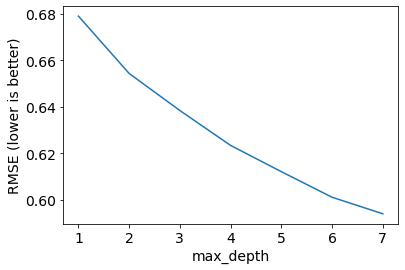

In [212]:
# Plot max_depth (x-axis) versus RMSE (y-axis).
plt.plot(max_depth_range, RMSE_scores);
plt.xlabel('max_depth');
plt.ylabel('RMSE (lower is better)');

In [213]:
# max_depth=3 was best, so fit a tree using that parameter.
treereg = DecisionTreeRegressor(max_depth=3, random_state=1)
treereg.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [214]:
# "Gini importance" of each feature: the (normalized) total reduction of error brought by that feature.
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_})

,feature,importance
0,Race,0.000000
1,Gender,0.010007
2,Grade,0.000000
3,Age,0.000000
4,ELLServed,0.000000
5,FreeReducedLunch,0.541791
6,SpecialEducation,0.000000
7,SOCFFEJ,0.097503
8,AAM,0.000000
9,HighlyCapable,0.000000


In [19]:
from sklearn.tree import export_graphviz
from sklearn import tree
export_graphviz(treereg, out_file='datga/gpa_tree.dot', feature_names=feature_cols)

In [215]:
import pydotplus 
gpa_tree = tree.export_graphviz(treereg, out_file=None) 
graph = pydotplus.graph_from_dot_data(gpa_tree) 
graph.write_pdf("./data/gpa_tree.pdf") 

True